In [74]:
pip install pingouin

Note: you may need to restart the kernel to use updated packages.


In [75]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy
import scipy.stats as stats
import missingno as msno
import pingouin as pg
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import math
from sklearn import decomposition
from sklearn import preprocessing
from sklearn import cluster


In [76]:
path_to_file = r'/Users/gulsumkapanoglu/Desktop/food/'

In [77]:
factfood=pd.read_csv(path_to_file + 'dernière_version.csv',sep=',')

In [78]:
print(factfood.shape)
factfood.head()

(17318, 19)


,code,product_name,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g,Gluten,nutriscore_grade
0,40608754,"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000,0.0,0.0254,13.0,0,d
1,87177756,7Up,"7Up,Pepsico","Sodas au citron,Boissons sucrées","Eau gazéifiée, sucre, acidifiants (acide citri...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000,0.0,0.1000,13.0,0,d
2,31858,Pur Soup' Velouté de légumes,Liebig,"Aliments et boissons à base de végétaux,Alimen...","eau, légumes 38% (jus de tomates à base de con...",b,Fruits and vegetables,Soups,188.0,2.100000,0.7,5.300000,2.4,0.800,0.8,0.7500,2.0,0,b
3,16229001919,Lait de coco,Aroy d,Laits de coco,"Extrait de noix de coco 60%, eau, emulsifiant ...",d,Beverages,Non-sugared beverages,774.0,14.066667,17.0,10.233333,2.0,0.000,1.6,0.0500,12.0,0,d
4,16229004507,Foco basil seed drink,Foco,"Beverages,Carbonated drinks,Sodas,Sugared beve...","Eau, graines de basilic, sucre (10%), arôme ar...",e,Beverages,Sweetened beverages,266.0,0.000000,0.0,15.800000,13.3,0.303,0.0,0.0231,18.0,0,e


In [79]:
factfood.columns

Index(['code', 'product_name', 'brands', 'categories', 'ingredients_text',
       'nutrition_grade_fr', 'pnns_groups_1', 'pnns_groups_2', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'fiber_100g', 'proteins_100g', 'salt_100g', 'nutrition-score-fr_100g',
       'Gluten', 'nutriscore_grade'],
      dtype='object')

### Le code de produit et nutrition-score-fr_100g ne sera pas utile dans cette analyse d'où on le supprime

In [80]:
factfood.drop(['code','nutrition-score-fr_100g'],axis=1,inplace=True)
factfood.set_index('product_name')

,brands,categories,ingredients_text,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,Gluten,nutriscore_grade
product_name,,,,,,,,,,,,,,,,
"Pepsi, Nouveau goût !",Pepsi,Sodas au cola,"Eau gazéifiée, sucre, colorant caramel E150d, ...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000000,0.0,0.0254,0,d
7Up,"7Up,Pepsico","Sodas au citron,Boissons sucrées","Eau gazéifiée, sucre, acidifiants (acide citri...",e,Beverages,Sweetened beverages,177.0,0.000000,0.0,10.400000,10.4,0.000000,0.0,0.1000,0,d
Pur Soup' Velouté de légumes,Liebig,"Aliments et boissons à base de végétaux,Alimen...","eau, légumes 38% (jus de tomates à base de con...",b,Fruits and vegetables,Soups,188.0,2.100000,0.7,5.300000,2.4,0.800000,0.8,0.7500,0,b
Lait de coco,Aroy d,Laits de coco,"Extrait de noix de coco 60%, eau, emulsifiant ...",d,Beverages,Non-sugared beverages,774.0,14.066667,17.0,10.233333,2.0,0.000000,1.6,0.0500,0,d
Foco basil seed drink,Foco,"Beverages,Carbonated drinks,Sodas,Sugared beve...","Eau, graines de basilic, sucre (10%), arôme ar...",e,Beverages,Sweetened beverages,266.0,0.000000,0.0,15.800000,13.3,0.303000,0.0,0.0231,0,e
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Boisson au chrysanthème,Yeo's,Boissons à base de végétaux,"Eau, extrait de chrysanthème (12%), sucre de c...",d,Beverages,Sweetened beverages,119.0,0.000000,0.0,7.000000,7.0,0.066667,0.0,0.0100,0,c
Lychee Drink,Yeo's,"Boissons,Boissons à base de végétaux,Boissons ...","Eau, sucre de canne, jus de litchi (2,5 %), ar...",e,Beverages,Sweetened beverages,173.0,0.000000,0.0,10.200000,10.1,0.000000,0.0,0.0100,0,d
Boisson au soja (soy bean 8%),Yeo's,"Boissons,Boissons non sucrées,Laits de soja","Eau, extrait de _soja_ (_soja_ 8 %), sucre de ...",b,Beverages,Sweetened beverages,214.0,1.100000,0.2,8.100000,7.8,0.000000,2.0,0.0000,0,b


# Analyse univariée

In [81]:
factfood.describe()

,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,Gluten
count,17318.000000,17318.000000,17318.000000,17318.000000,17318.000000,17318.000000,17318.000000,17318.00000,17318.000000
mean,411.257947,3.788394,1.364185,10.233093,5.681385,1.331158,5.795427,1.01408,0.043481
std,237.893601,4.500293,2.086546,10.189598,7.306913,2.388825,6.938090,4.27368,0.203943
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,201.000000,0.300000,0.100000,3.100000,0.800000,0.200000,0.800000,0.07620,0.000000
50%,393.000000,2.300000,0.600000,8.500000,2.800000,0.900000,3.200000,0.51000,0.000000
75%,593.000000,6.000000,1.900000,13.800000,9.300000,1.866667,7.500000,1.01600,0.000000
max,900.000000,92.000000,63.000000,99.300000,100.000000,87.500000,86.000000,100.00000,1.000000


In [82]:
len(factfood.salt_100g[factfood.salt_100g>20])/17500

0.0034857142857142856

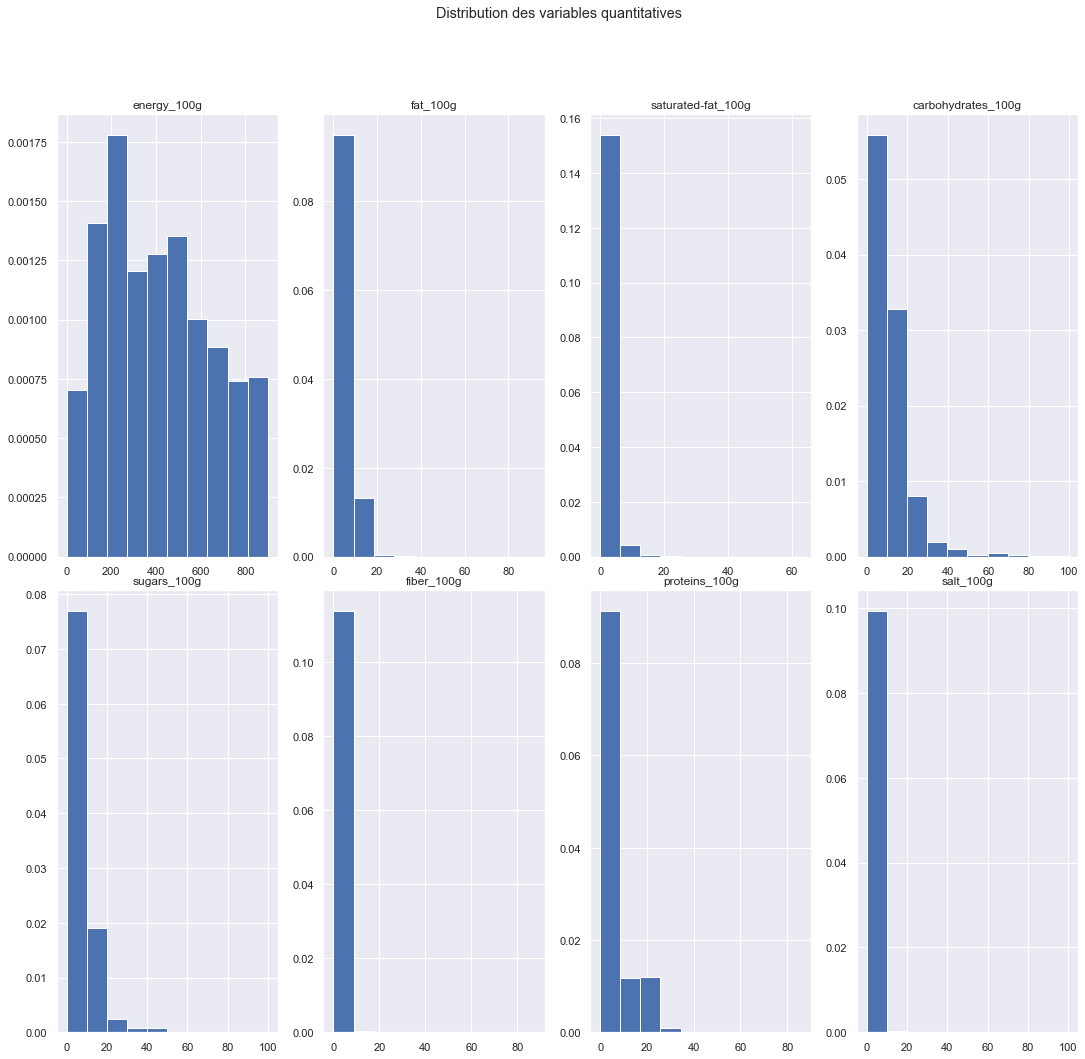

In [83]:
numcols = list(factfood.select_dtypes(include=['uint8','float']).columns)
fig, axes = plt.subplots(2, 4,figsize=(15,15))
sns.set(font_scale=1)
plt.gcf().subplots_adjust(right = 1.3, top = 1, hspace = 0.3)
plt.suptitle('Distribution des variables quantitatives')
fig.tight_layout() 
fig.subplots_adjust(top=0.88)

for col,axe in zip(numcols,axes.flat):
    factfood[col].hist(density=True,bins=10,ax=axe)
    axe.title.set_text(col)
plt.show()

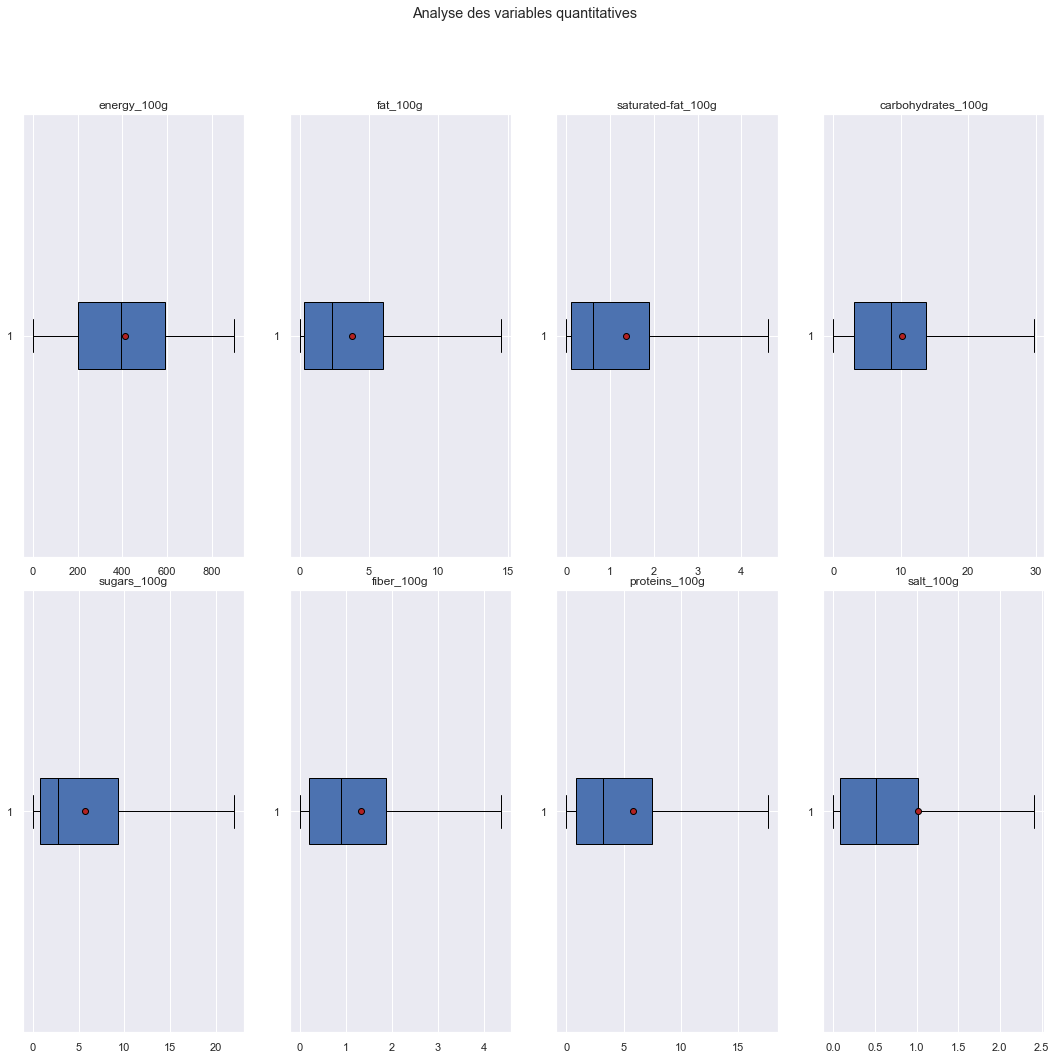

In [84]:
numcols = list(factfood.select_dtypes(include=['uint8','float']).columns)
fig, axes = plt.subplots(2, 4,figsize=(15,15))
sns.set(font_scale=1)
plt.gcf().subplots_adjust(right = 1.3, top = 1, hspace = 0.3)
plt.suptitle('Analyse des variables quantitatives')
fig.tight_layout() 
fig.subplots_adjust(top=0.88)

medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
for col,axe in zip(numcols,axes.flat):
    axe.boxplot(factfood[col], showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
    axe.title.set_text(col)

plt.show()

# Analyse des variables qualitatives 

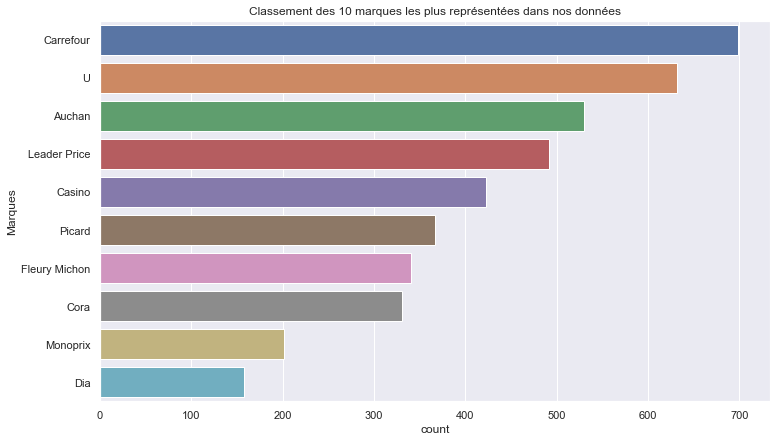

In [85]:
plt.figure(figsize=(12, 7))
sns.countplot(y="brands", data=factfood, order=pd.value_counts(factfood['brands']).iloc[:10].index)
plt.ylabel("Marques")
plt.title("Classement des 10 marques les plus représentées dans nos données")

plt.show()

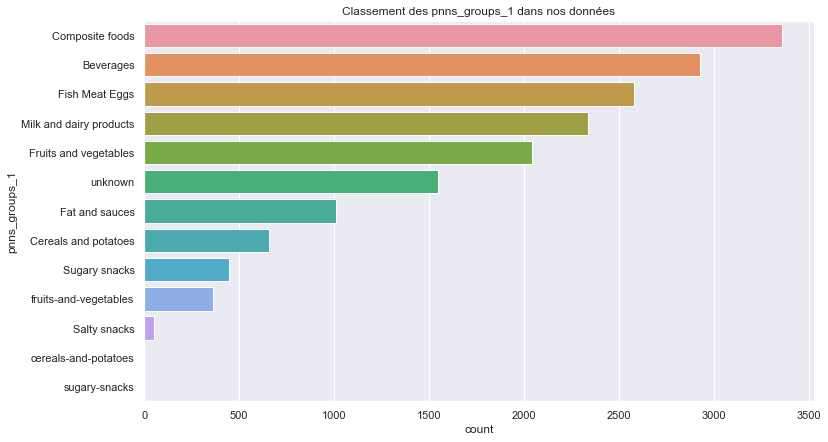

In [86]:
plt.figure(figsize=(12, 7))
sns.countplot(y="pnns_groups_1", data=factfood, order=pd.value_counts(factfood['pnns_groups_1']).index)
plt.ylabel("pnns_groups_1")
plt.title("Classement des pnns_groups_1 dans nos données")
plt.show()

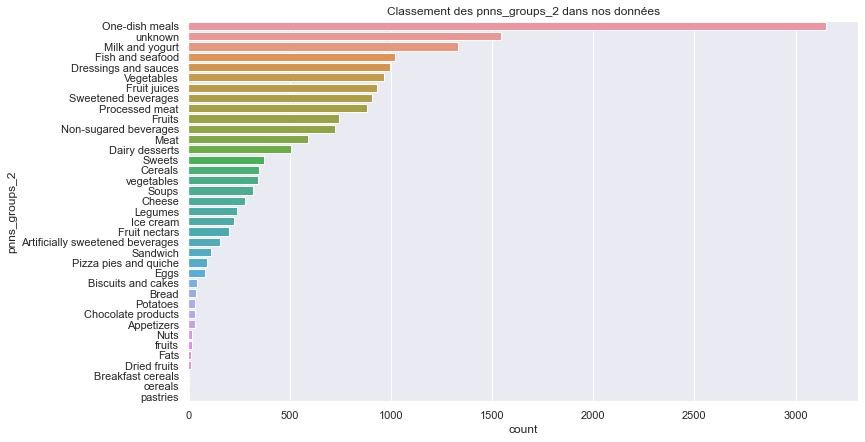

In [87]:
plt.figure(figsize=(12, 7))
sns.countplot(y="pnns_groups_2", data=factfood, order=pd.value_counts(factfood['pnns_groups_2']).index)
plt.ylabel("pnns_groups_2")
plt.title("Classement des pnns_groups_2 dans nos données")
plt.show()

In [88]:
factfood['categories'] = factfood['categories'].str.split(',').str[0]

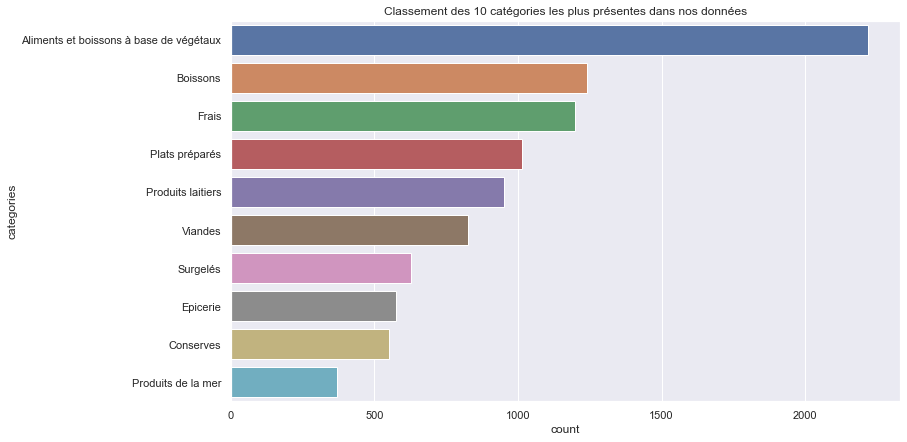

In [89]:
plt.figure(figsize=(12, 7))
sns.countplot(y="categories", data=factfood, order=pd.value_counts(factfood['categories']).iloc[:10].index)
plt.ylabel("categories")
plt.title("Classement des 10 catégories les plus présentes dans nos données")
plt.show()

In [90]:
factfood.groupby('nutriscore_grade').size()

nutriscore_grade
a    3681
b    6983
c    4722
d    1734
e     198
dtype: int64

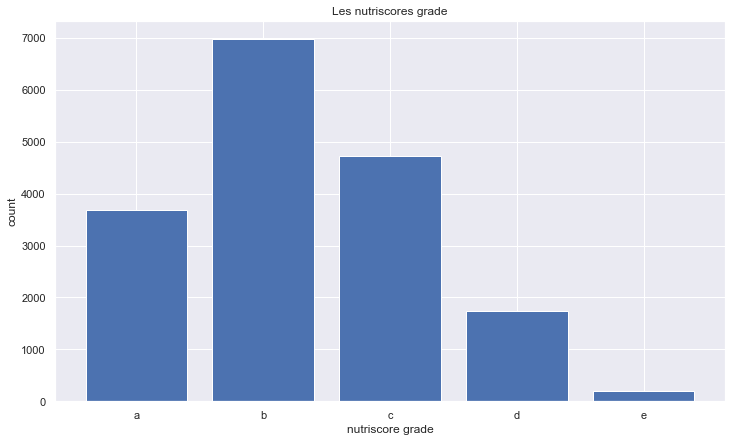

In [91]:
plt.figure(figsize=(12, 7))
height =factfood.groupby('nutriscore_grade').size()
bars = factfood.groupby('nutriscore_grade').size().index
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)

plt.title('Les nutriscores grade')
plt.xlabel('nutriscore grade')
plt.ylabel('count')
 
plt.xticks(x_pos, bars)
plt.show()

In [92]:
factfood.groupby('Gluten').size()

Gluten
0    16565
1      753
dtype: int64

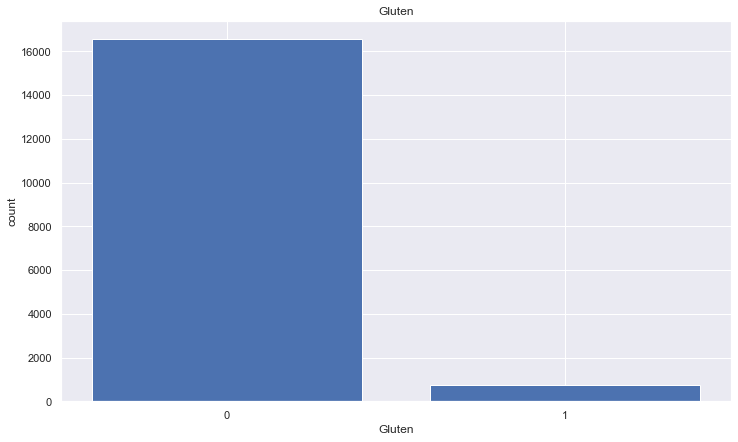

In [93]:
plt.figure(figsize=(12, 7))
height =factfood.groupby('Gluten').size()
bars = factfood.groupby('Gluten').size().index
x_pos = np.arange(len(bars))
plt.bar(x_pos, height)

plt.title('Gluten')
plt.xlabel('Gluten')
plt.ylabel('count')
 
plt.xticks(x_pos, bars)
plt.show()

### Analyses bivariées des variables quantitatives

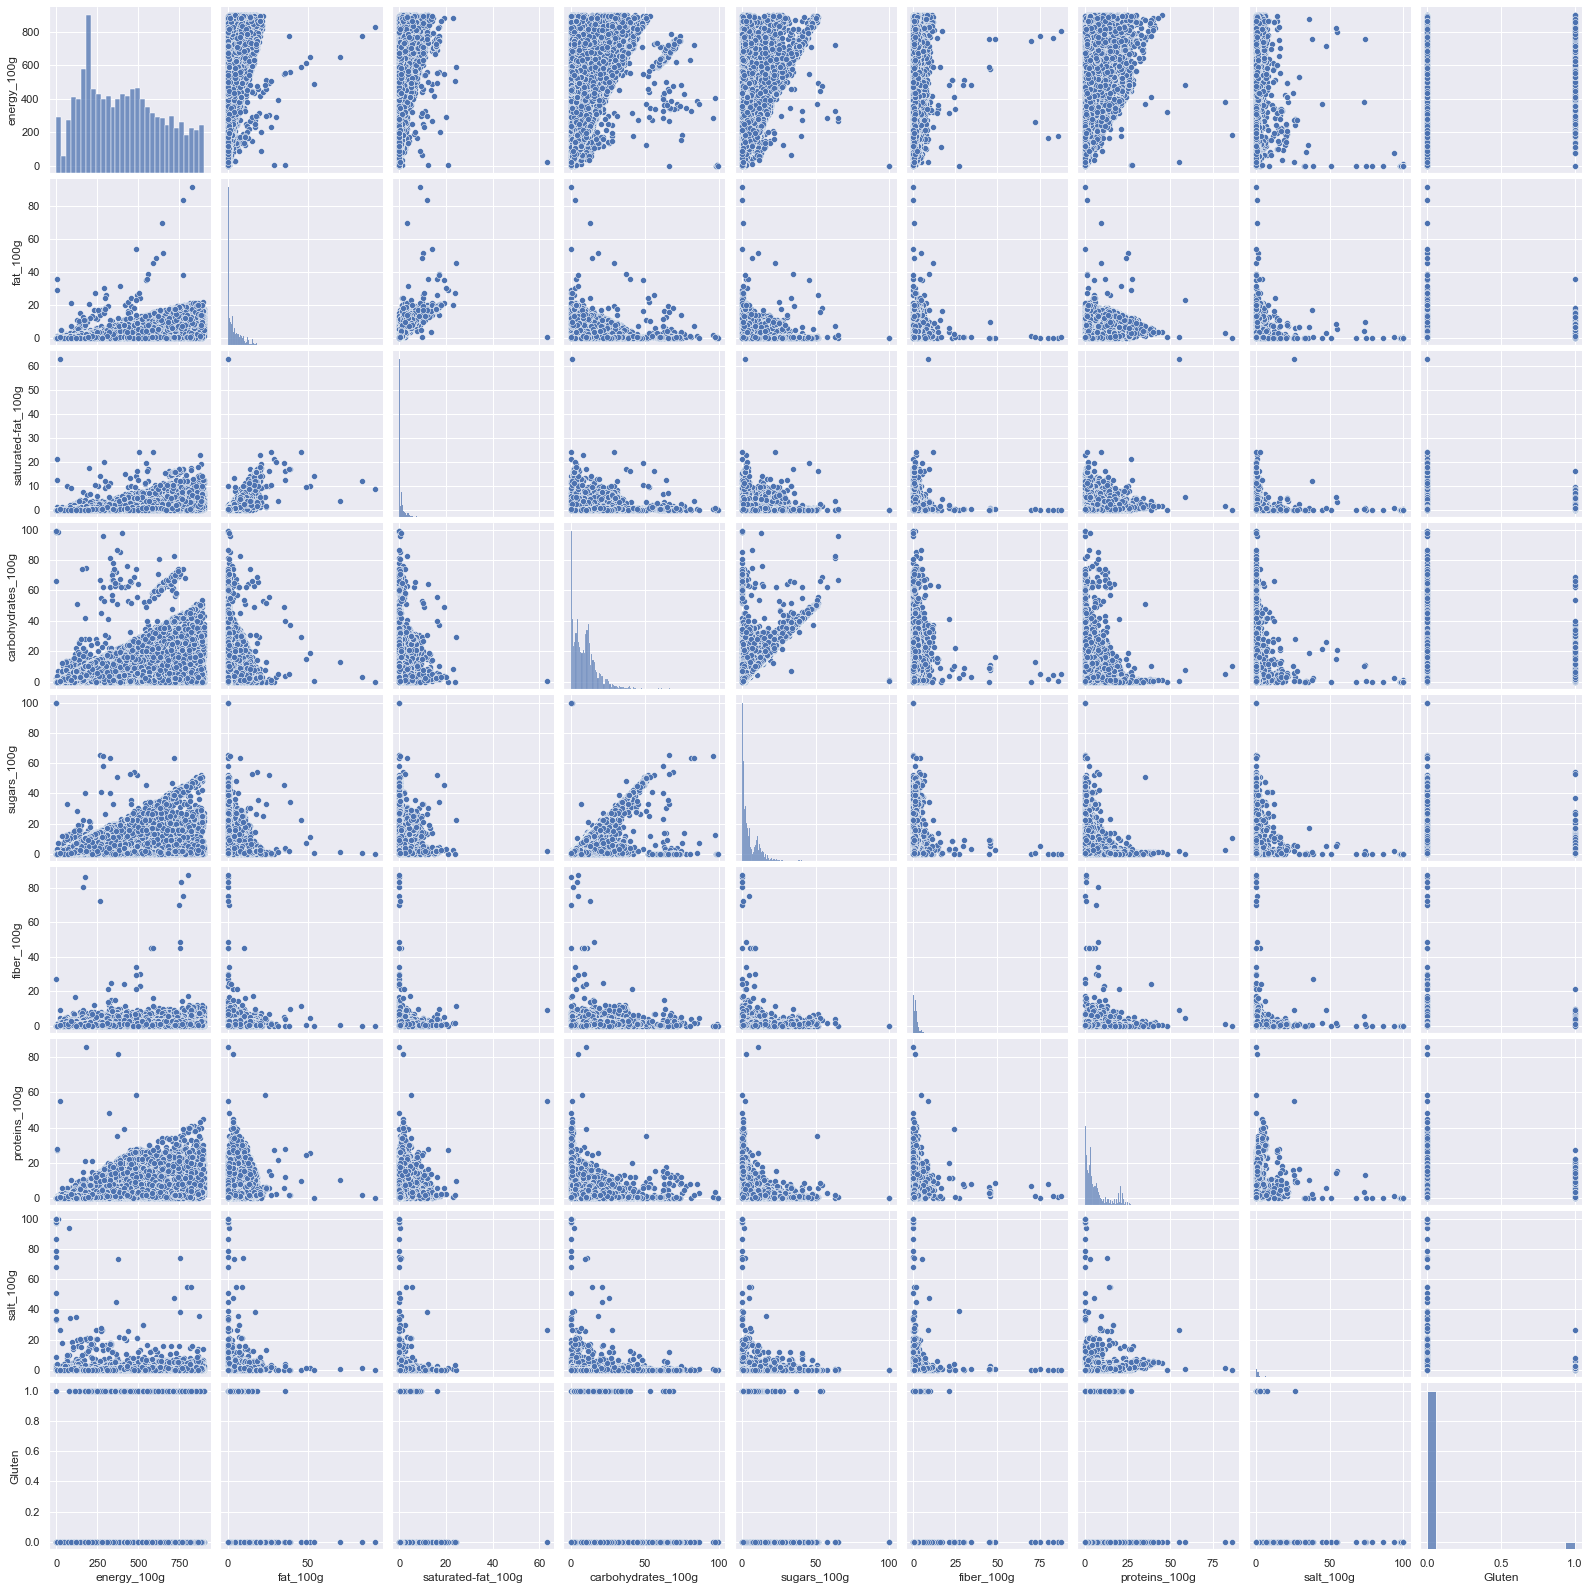

In [94]:
sns.pairplot(factfood)

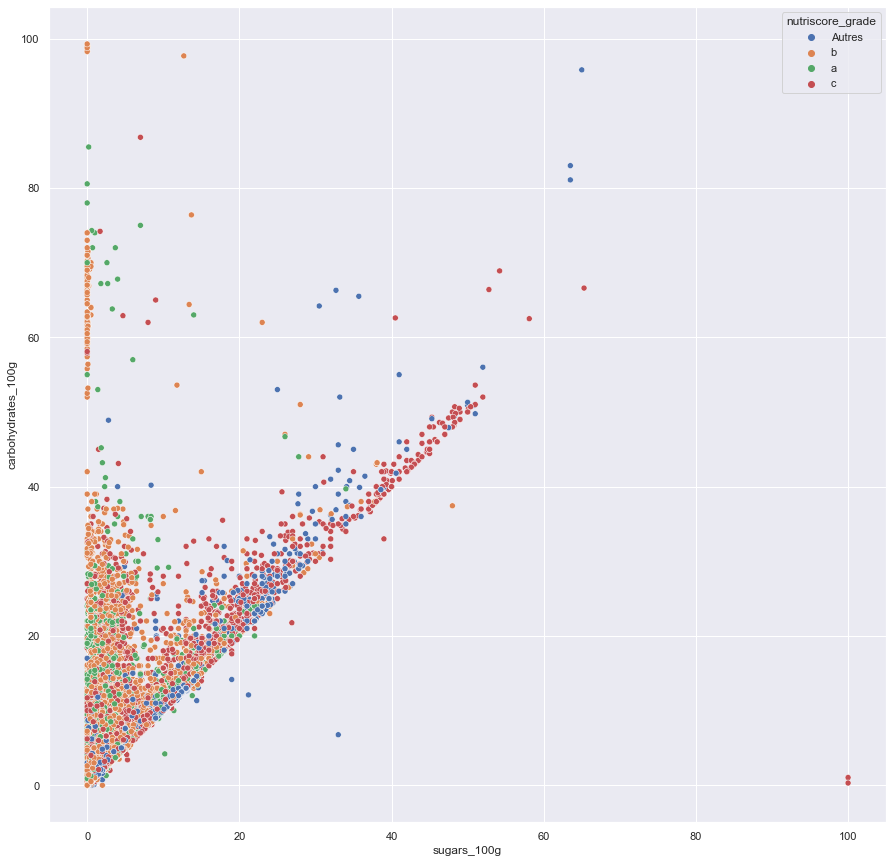

In [95]:
Y = ["sugars_100g" ,"carbohydrates_100g" ]# quantitative
X='nutriscore_grade'

sous_echantillon=factfood[[X,Y[0],Y[1]]].copy()
modalites = sous_echantillon[X].unique()

lst=[[len(sous_echantillon[sous_echantillon[X]==m][Y]),m] for m in modalites]
df=pd.DataFrame(lst,columns=['value',X])
df['catbis']=df[X]
df.loc[df.value<np.mean(df.value),'catbis']='Autres'

sous_echantillon=sous_echantillon.merge(df,on=X,how='left')

sous_echantillon.drop([X,'value'],axis=1,inplace=True)
sous_echantillon.rename(columns={'catbis':X},inplace=True)
sous_echantillon
plt.figure(figsize=(15,15))   
sns.scatterplot(data=sous_echantillon, x=Y[0], y=Y[1],hue='nutriscore_grade')
plt.show()

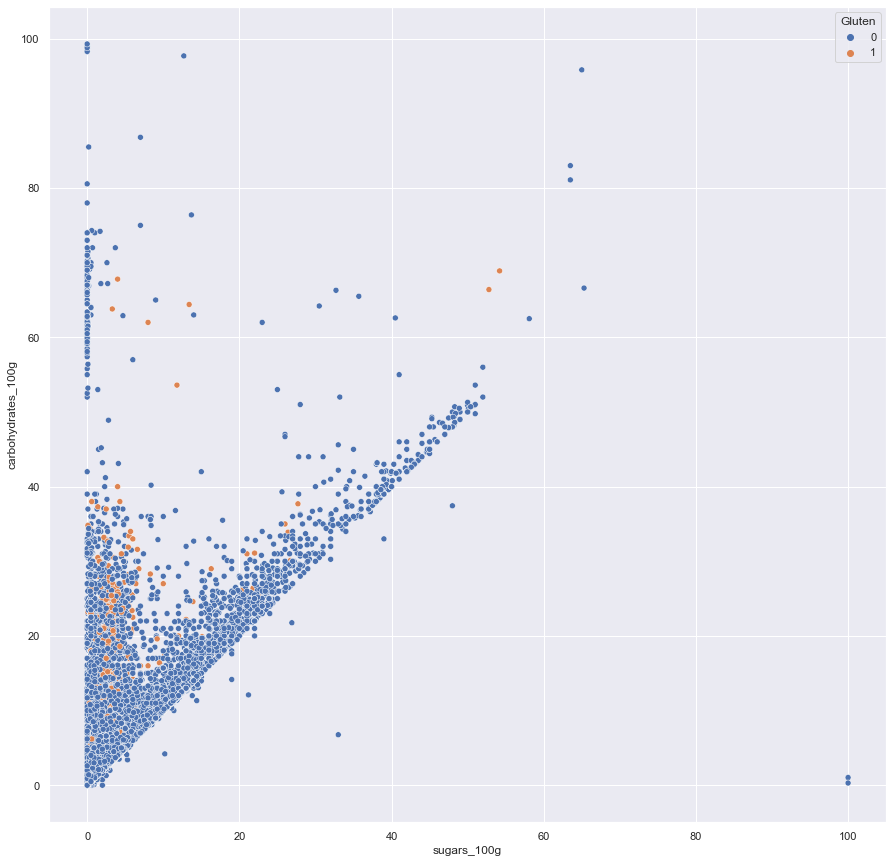

In [96]:
Y = ["sugars_100g" ,"carbohydrates_100g" ]# quantitative
X='Gluten'

sous_echantillon=factfood[[X,Y[0],Y[1]]].copy()
modalites = sous_echantillon[X].unique()
lst=[[len(sous_echantillon[sous_echantillon[X]==m][Y]),m] for m in modalites]
df=pd.DataFrame(lst,columns=['value',X])
df['catbis']=df[X]
df.loc[df.value<np.mean(df.value),'catbis']='1'

sous_echantillon=sous_echantillon.merge(df,on=X,how='left')
sous_echantillon.drop([X,'value'],axis=1,inplace=True)
sous_echantillon.rename(columns={'catbis':X},inplace=True)
sous_echantillon
plt.figure(figsize=(15,15))   
sns.scatterplot(data=sous_echantillon, x=Y[0], y=Y[1],hue='Gluten')
plt.show()

In [97]:
factfood.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17318 entries, 0 to 17317
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   product_name        17318 non-null  object 
 1   brands              17318 non-null  object 
 2   categories          17318 non-null  object 
 3   ingredients_text    17318 non-null  object 
 4   nutrition_grade_fr  17318 non-null  object 
 5   pnns_groups_1       17318 non-null  object 
 6   pnns_groups_2       17318 non-null  object 
 7   energy_100g         17318 non-null  float64
 8   fat_100g            17318 non-null  float64
 9   saturated-fat_100g  17318 non-null  float64
 10  carbohydrates_100g  17318 non-null  float64
 11  sugars_100g         17318 non-null  float64
 12  fiber_100g          17318 non-null  float64
 13  proteins_100g       17318 non-null  float64
 14  salt_100g           17318 non-null  float64
 15  Gluten              17318 non-null  int64  
 16  nutr

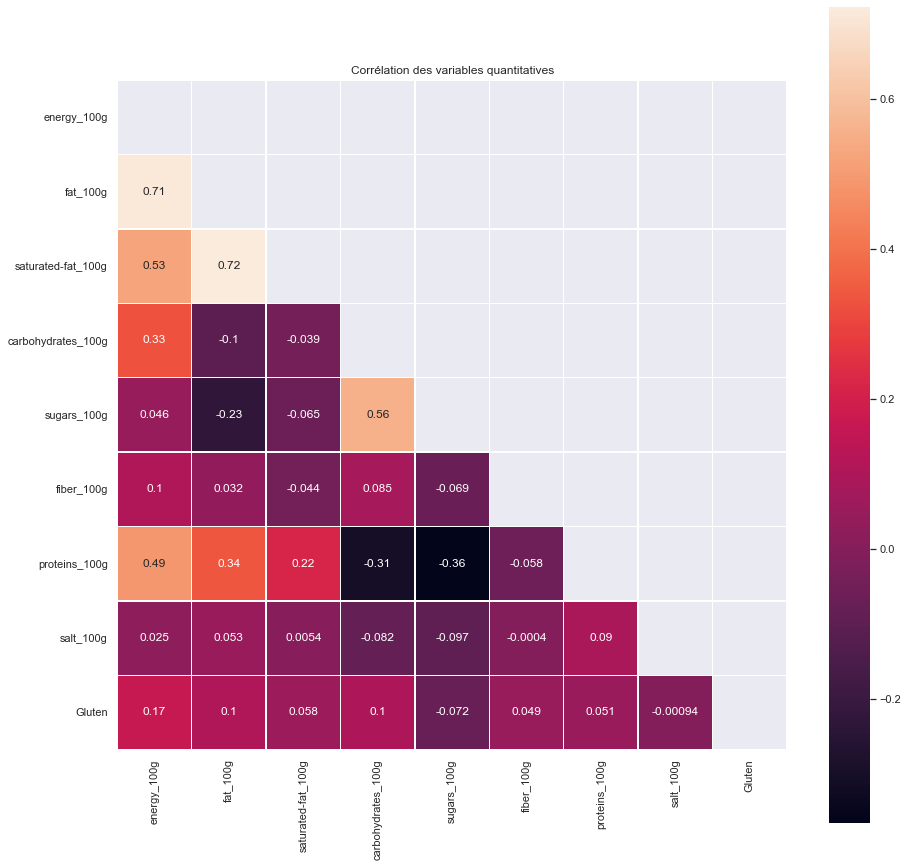

In [98]:
corr_food = factfood.corr()
mask = np.triu(corr_food)
plt.figure(figsize=(15,15))
sns.heatmap(corr_food, mask=mask, linewidths=.5, annot=True, cbar=True, square=True)
plt.title("Corrélation des variables quantitatives")
plt.show()



- Il y des fort corrélations entre de "energy_100g" avec "fat_100g"(coeff de corr= 0,71),
- "fat_100g" et "saturated-fat_100g" (coeff de corr= 0,72) 
- sugars_100g et "carbohydrates_100g"(coeff de corr= 0,56). 
En effet, les graisses, et les glucides sont ceux qui fournissent le plus d'énergie. Ces corrélations sont donc cohérentes.

De plus, il y a une corrélation forte entre "fat_100g" et "saturated-fat_100g" (coeff de corr= 0,73), 
ainsi qu'entre "carbohydrates_100g" et "sugar_100g" (coeff de corr= 0,56). 
Nutritionellement, les graisses saturées sont une catégorie spécifique de graisse. 
De même que le sucre qui se divise en carbohydrates. 
Il est donc logique de voir des corrélations fortes pour ces deux cas.

***Par conséquent, nous effectuerons une régression linéaire à partir des corrélations 
trouvées pour mieux voir ce qui relie ces variables.***

#### Analyses de régression entre variables quantitatives

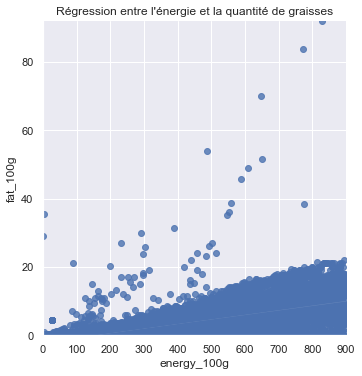

In [99]:
sns.lmplot(x="energy_100g", y="fat_100g", data=factfood)
plt.title("Régression entre l'énergie et la quantité de graisses")
plt.xlim(factfood["energy_100g"].min(), factfood["energy_100g"].max())
plt.ylim(factfood["fat_100g"].min(), factfood["fat_100g"].max())
plt.show()

In [100]:
pg.linear_regression(X=factfood["energy_100g"], y=factfood["fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-1.753435,0.047936,-36.578511,3.107797e-282,0.507413,0.507385,-1.847395,-1.659475
1,energy_100g,0.013475,0.000101,133.555947,0.000000e+00,0.507413,0.507385,0.013278,0.013673


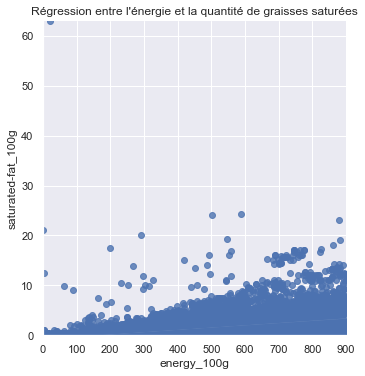

In [101]:
sns.lmplot(x="energy_100g", y="saturated-fat_100g", data=factfood)
plt.title("Régression entre l'énergie et la quantité de graisses saturées")
plt.xlim(factfood["energy_100g"].min(), factfood["energy_100g"].max())
plt.ylim(factfood["saturated-fat_100g"].min(), factfood["saturated-fat_100g"].max())
plt.show()

In [102]:
pg.linear_regression(X=factfood["energy_100g"], y=factfood["saturated-fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,-0.531937,0.026939,-19.745946,7.640075e-86,0.276321,0.276279,-0.584741,-0.479134
1,energy_100g,0.004611,0.000057,81.312559,0.000000e+00,0.276321,0.276279,0.004499,0.004722


Je voulais faire un test de normalité ici pour m'assurer que les données sont distribuées normalement.
J'ai choisi le test de **Kolmogorov-Smirnov** qui est le plus adapté à notre échantillon.

In [103]:
control=factfood[["energy_100g","fat_100g","saturated-fat_100g","carbohydrates_100g","sugars_100g","fiber_100g","proteins_100g","salt_100g"]]

In [104]:
from scipy.stats import ks_2samp

for col in control:
    print ("Variable:",col)
    print('statistique:\n',ks_2samp(factfood[col],list(np.random.normal(np.mean(factfood[col]), np.std(factfood[col]), 1000))))
    print("Test de Shapiro-Wilk",scipy.stats.shapiro(factfood[col]))
    print("\n")
    print("*"*20)

Variable: energy_100g
statistique:
 KstestResult(statistic=0.07662582284328445, pvalue=2.8457490110230126e-05)
Test de Shapiro-Wilk ShapiroResult(statistic=0.9624361991882324, pvalue=0.0)


********************
Variable: fat_100g
statistique:
 KstestResult(statistic=0.195, pvalue=5.896868042287564e-32)
Test de Shapiro-Wilk ShapiroResult(statistic=0.7877333164215088, pvalue=0.0)


********************
Variable: saturated-fat_100g
statistique:
 KstestResult(statistic=0.261, pvalue=2.7793638166684956e-57)
Test de Shapiro-Wilk ShapiroResult(statistic=0.6483395099639893, pvalue=0.0)


********************
Variable: carbohydrates_100g
statistique:
 KstestResult(statistic=0.1481861646841437, pvalue=1.4083084412975674e-18)
Test de Shapiro-Wilk ShapiroResult(statistic=0.7918785810470581, pvalue=0.0)


********************
Variable: sugars_100g
statistique:
 KstestResult(statistic=0.216, pvalue=3.495799785019673e-39)
Test de Shapiro-Wilk ShapiroResult(statistic=0.723166823387146, pvalue=0.0)


*

Aucune de nos variables ne suit une loi normale.

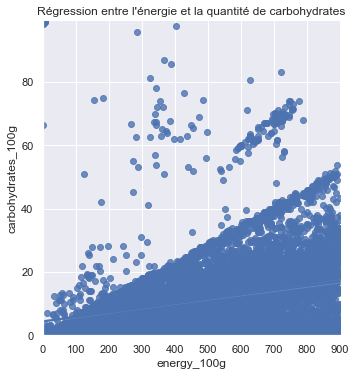

In [105]:
sns.lmplot(x="energy_100g", y="carbohydrates_100g", data=factfood)
plt.title("Régression entre l'énergie et la quantité de carbohydrates")
plt.xlim(factfood["energy_100g"].min(), factfood["energy_100g"].max())
plt.ylim(factfood["carbohydrates_100g"].min(), factfood["carbohydrates_100g"].max())
plt.show()

In [106]:
pg.linear_regression(X=factfood["energy_100g"], y=factfood["carbohydrates_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,4.396212,0.145909,30.129724,1.998372e-194,0.109795,0.109744,4.110215,4.682210
1,energy_100g,0.014193,0.000307,46.213739,0.000000e+00,0.109795,0.109744,0.013591,0.014795


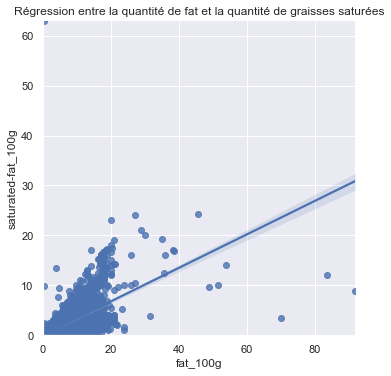

In [107]:
sns.lmplot(x="fat_100g", y="saturated-fat_100g", data=factfood)
plt.title("Régression entre la quantité de fat et la quantité de graisses saturées")
plt.xlim(factfood["fat_100g"].min(), factfood["fat_100g"].max())
plt.ylim(factfood["saturated-fat_100g"].min(), factfood["saturated-fat_100g"].max())
plt.show()

In [108]:
pg.linear_regression(X=factfood["fat_100g"], y=factfood["saturated-fat_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,0.095875,0.014339,6.686449,2.356353e-11,0.521394,0.521366,0.06777,0.123981
1,fat_100g,0.334788,0.002438,137.346477,0.000000e+00,0.521394,0.521366,0.33001,0.339566


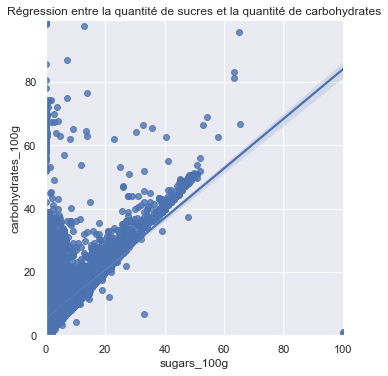

In [109]:
sns.lmplot(x="sugars_100g", y="carbohydrates_100g", data=factfood)
plt.title("Régression entre la quantité de sucres et la quantité de carbohydrates")
plt.xlim(factfood["sugars_100g"].min(), factfood["sugars_100g"].max())
plt.ylim(factfood["carbohydrates_100g"].min(), factfood["carbohydrates_100g"].max())
plt.show()

In [110]:
pg.linear_regression(X=factfood["sugars_100g"], y=factfood["carbohydrates_100g"], add_intercept=True, alpha=0.05)

,names,coef,se,T,pval,r2,adj_r2,CI[2.5%],CI[97.5%]
0,Intercept,5.791930,0.081226,71.306371,0.0,0.314223,0.314184,5.632719,5.951141
1,sugars_100g,0.781704,0.008776,89.074173,0.0,0.314223,0.314184,0.764503,0.798906


### Analyses bivariées des variables qualitatives

La table de contingence est un décompte entre deux variables catégorielles

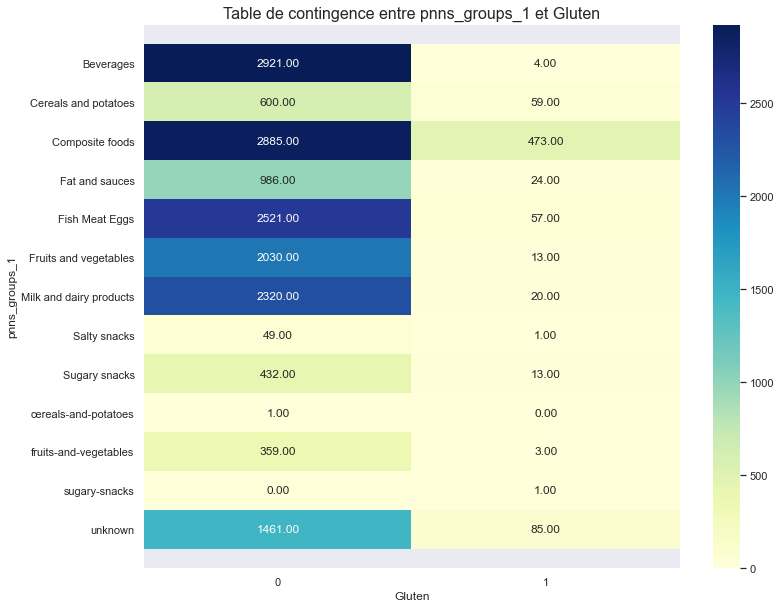

In [111]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(factfood['pnns_groups_1'],factfood['Gluten']), annot=True, fmt='.2f', cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Table de contingence entre pnns_groups_1 et Gluten',fontsize=16)
plt.show()

Les produits du groupe Composite foods sont majoritairement de contient du Gluten. 

La category de unknown contient du Gluten.


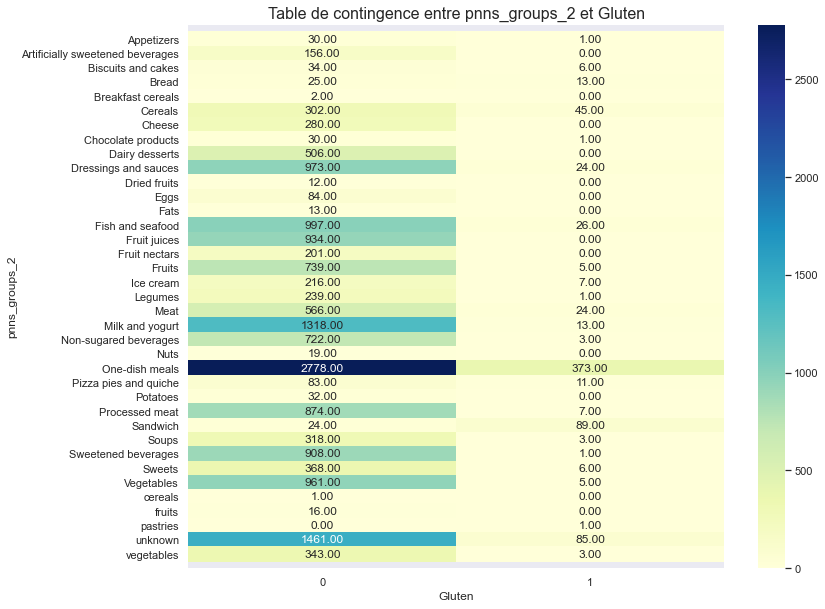

In [112]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(factfood['pnns_groups_2'],factfood['Gluten']), annot=True, fmt='.2f', cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Table de contingence entre pnns_groups_2 et Gluten',fontsize=16)
plt.show()

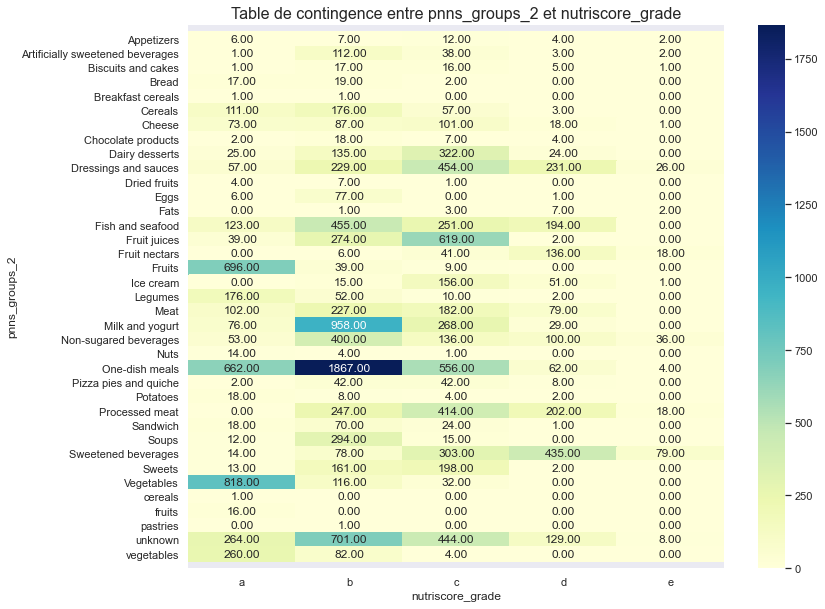

In [113]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(pd.crosstab(factfood['pnns_groups_2'],factfood['nutriscore_grade']), annot=True, fmt='.2f', cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.title('Table de contingence entre pnns_groups_2 et nutriscore_grade',fontsize=16)
plt.show()

Les produits du groupe One-dish meals sont majoritairement de contient du Gluten. 

Egalement, Processed meat et la category de unknown contient du Gluten.



# Analyses bivariées des variables qualitatives et quantitatives

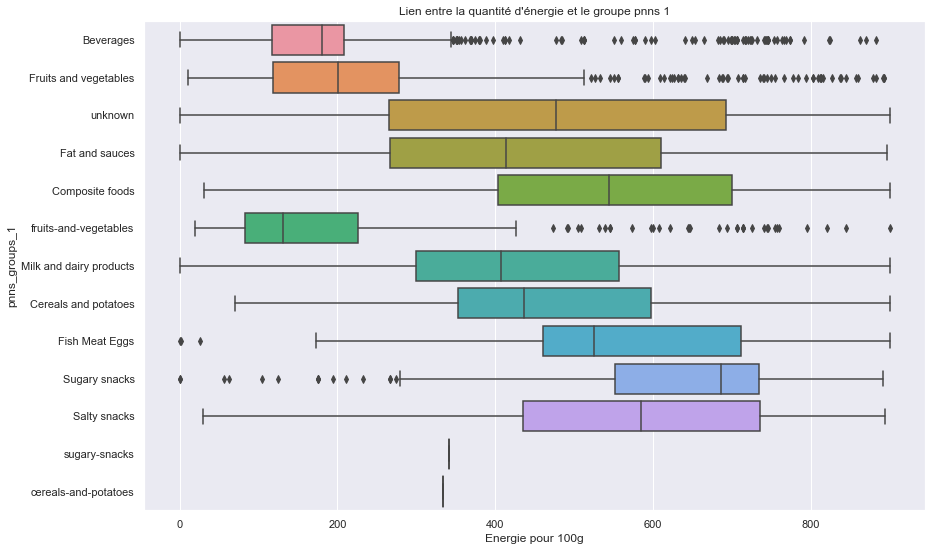

In [114]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="energy_100g", y="pnns_groups_1", data=factfood)
plt.title("Lien entre la quantité d'énergie et le groupe pnns 1")
plt.xlabel("Energie pour 100g")
plt.ylabel("pnns_groups_1")
plt.show()


Les fruits-and-vegetables et les beverages sont les groupes les moins caloriques 

Les salty et sugary snacks sont le groupe le plus calorique.

In [115]:
pg.anova(data=factfood, dv="energy_100g", between="pnns_groups_1")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_1,12,17305,1101.85645,0.0,0.43313


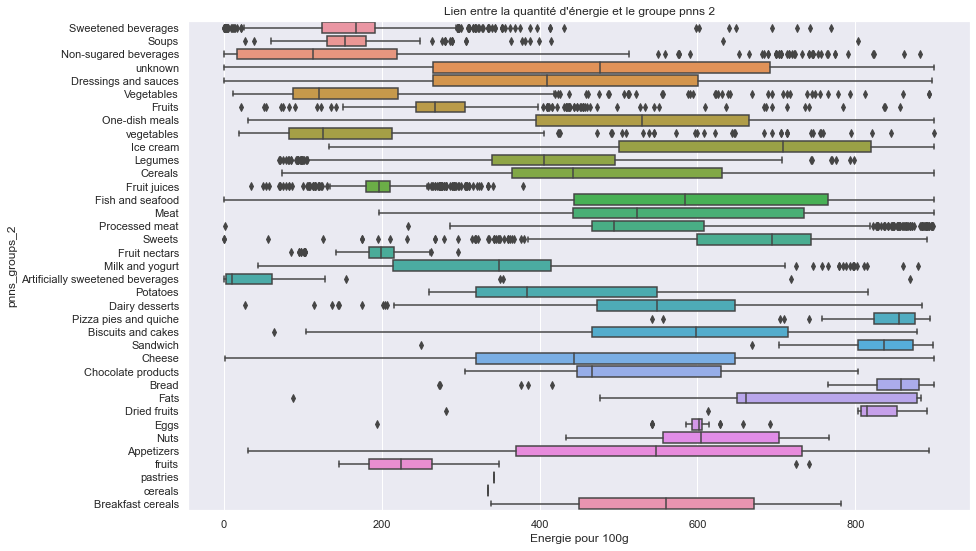

In [116]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="energy_100g", y="pnns_groups_2", data=factfood)
plt.title("Lien entre la quantité d'énergie et le groupe pnns 2")
plt.xlabel("Energie pour 100g")
plt.ylabel("pnns_groups_2")
plt.show()

Icı, on voit que les artificially sweetened beverages sont les groupes les moins caloriques.

Les Breads et les fats sont le groupe le plus calorique.

In [117]:
pg.anova(data=factfood, dv="energy_100g", between="pnns_groups_2")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_2,36,17281,485.831217,0.0,0.503004


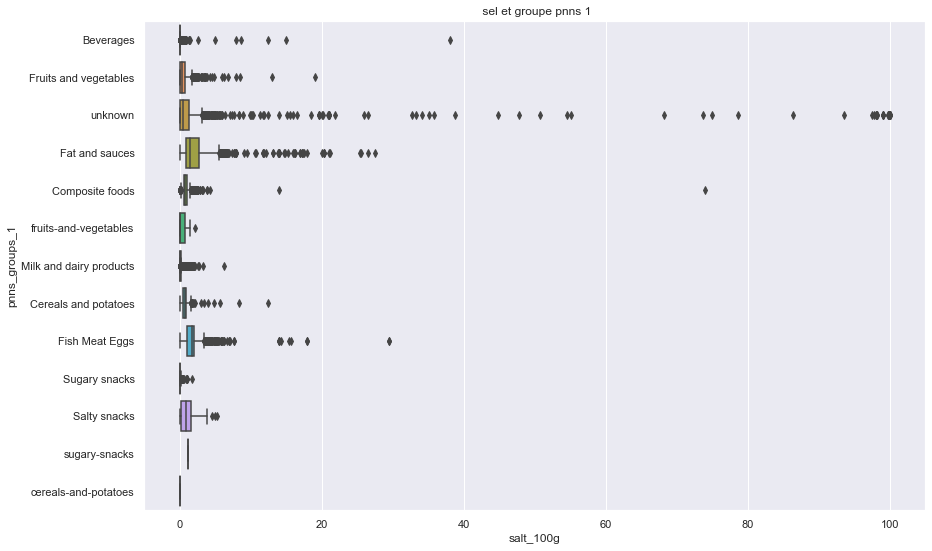

In [118]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="salt_100g", y="pnns_groups_1", data=factfood)
plt.title(" sel et groupe pnns 1")
plt.xlabel("salt_100g")
plt.ylabel("pnns_groups_1")
plt.show()

Les fat and sauces products sont les plus riches en sels 

Les sugary-snacks sont les plus pauvres en sel ce qui est tout à fait logique

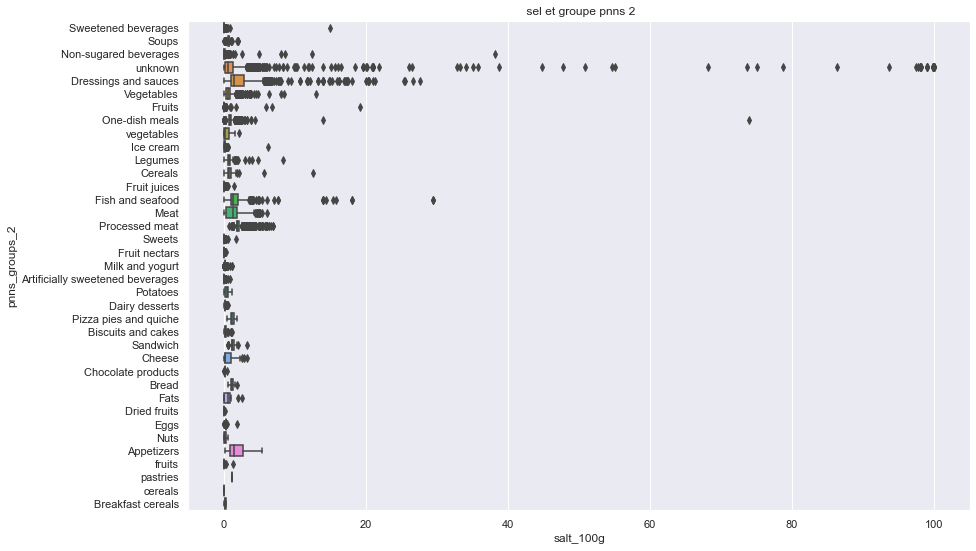

In [119]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="salt_100g", y="pnns_groups_2", data=factfood)
plt.title(" sel et groupe pnns 2")
plt.xlabel("salt_100g")
plt.ylabel("pnns_groups_2")
plt.show()

In [120]:
pg.anova(data=factfood, dv="salt_100g", between="pnns_groups_2")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_2,36,17281,28.422011,1.753648e-185,0.055899


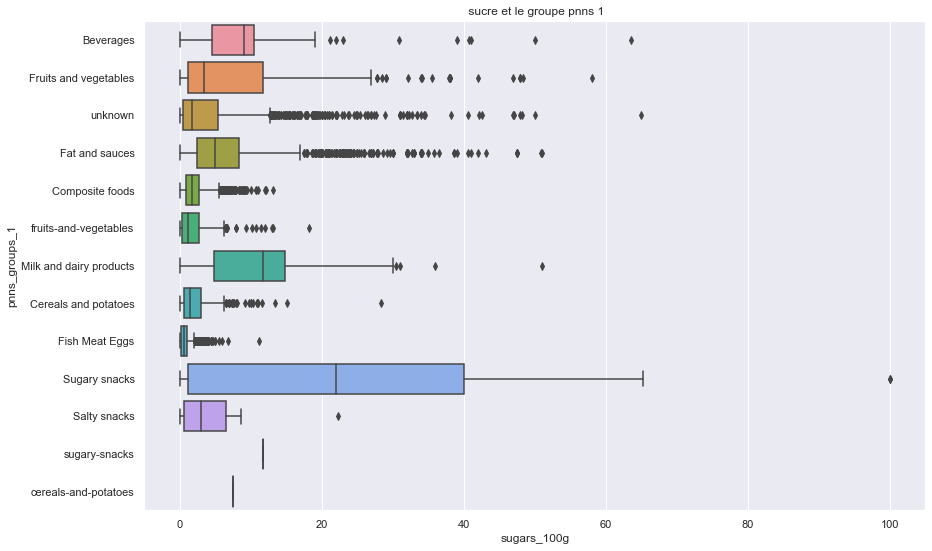

In [121]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="sugars_100g", y="pnns_groups_1", data=factfood)
plt.title(" sucre et le groupe pnns 1")
plt.xlabel("sugars_100g")
plt.ylabel("pnns_groups_1")
plt.show()

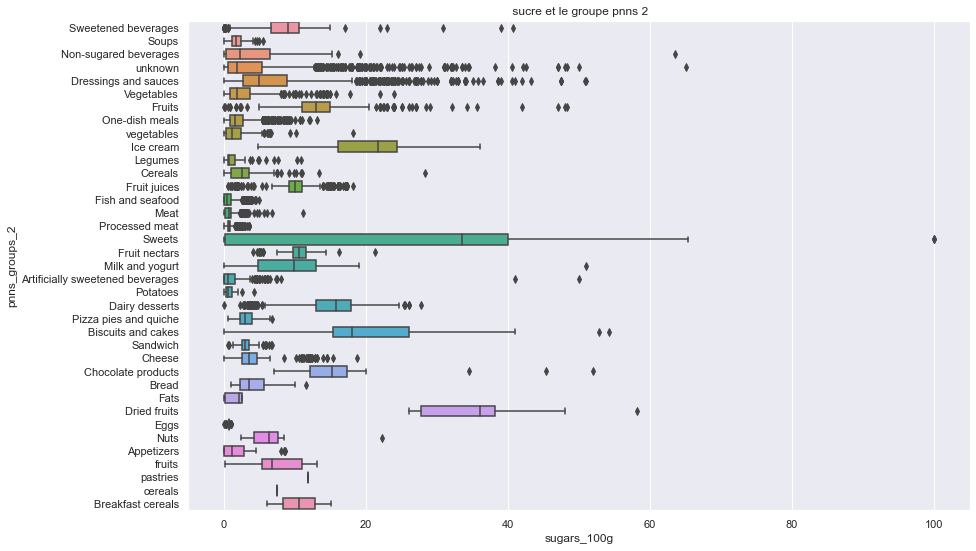

In [122]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="sugars_100g", y="pnns_groups_2", data=factfood)
plt.title(" sucre et le groupe pnns 2")
plt.xlabel("sugars_100g")
plt.ylabel("pnns_groups_2")
plt.show()

Les dried fruits et sweets sont les plus riches en sucres, ce qui est assez logique.

Les eggs et les fats sont les plus pauvres en sucre

In [123]:
pg.anova(data=factfood, dv="sugars_100g", between="pnns_groups_2")

,Source,ddof1,ddof2,F,p-unc,np2
0,pnns_groups_2,36,17281,529.397347,0.0,0.524454


In [124]:
pg.anova(data=factfood, dv="energy_100g", between="Gluten")


,Source,ddof1,ddof2,F,p-unc,np2
0,Gluten,1,17316,514.244955,3.243392e-112,0.028841


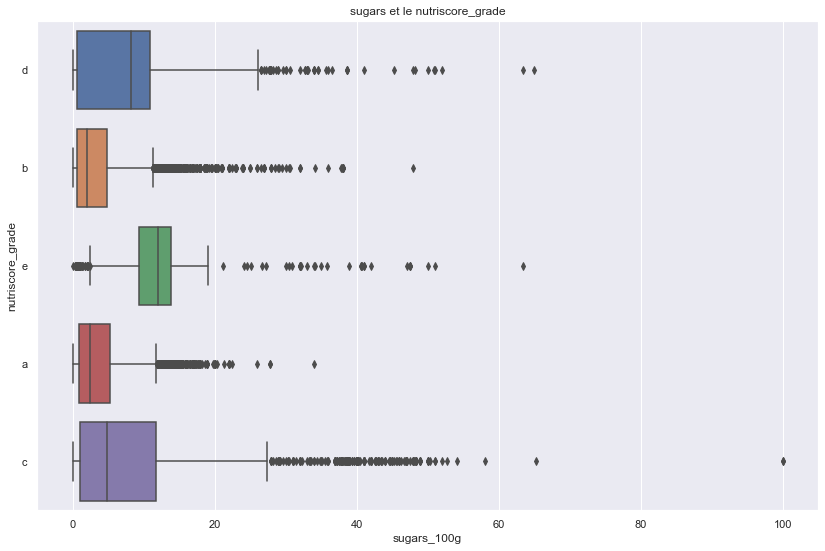

In [125]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="sugars_100g", y="nutriscore_grade", data=factfood)
plt.title("sugars et le nutriscore_grade")
plt.xlabel("sugars_100g")
plt.ylabel("nutriscore_grade")
plt.show()

In [126]:
pg.anova(data=factfood, dv="sugars_100g", between="nutriscore_grade")

,Source,ddof1,ddof2,F,p-unc,np2
0,nutriscore_grade,4,17313,412.954077,0.0,0.087099


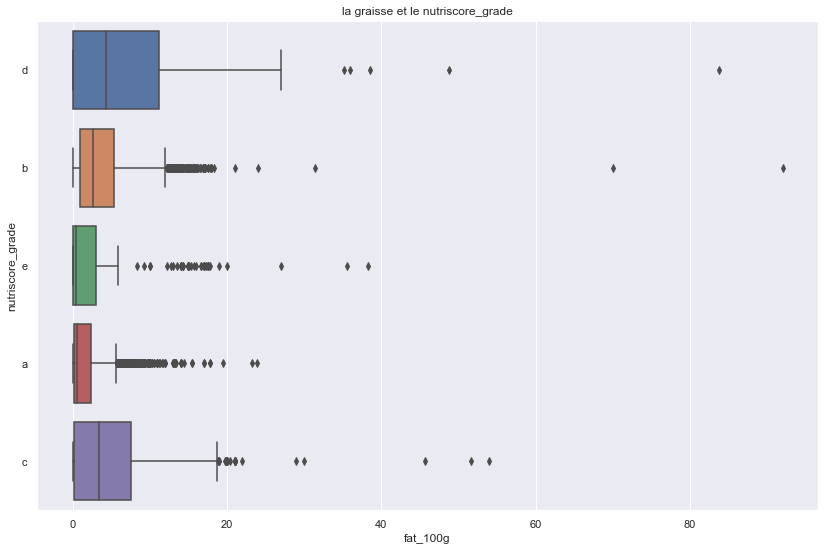

In [127]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="fat_100g", y="nutriscore_grade", data=factfood)
plt.title("la graisse et le nutriscore_grade")
plt.xlabel("fat_100g")
plt.ylabel("nutriscore_grade")
plt.show()

In [128]:
pg.anova(data=factfood, dv="fat_100g", between="nutriscore_grade")

,Source,ddof1,ddof2,F,p-unc,np2
0,nutriscore_grade,4,17313,390.428808,1.482197e-322,0.082741


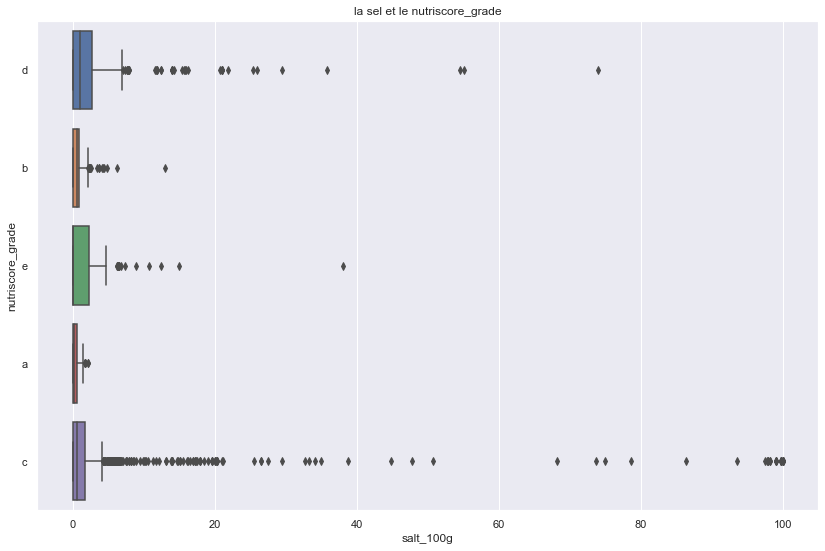

In [129]:
plt.figure(figsize=(14, 9))
sns.boxplot(x="salt_100g", y="nutriscore_grade", data=factfood)
plt.title("la sel et le nutriscore_grade")
plt.xlabel("salt_100g")
plt.ylabel("nutriscore_grade")
plt.show()

Le nutriscore A est le plus pauvre en sel, en sucre et en lipides.
Étant donné que ces ratios sont pris en compte lors du calcul des nutriscores, 
donc on peut dire que le résultat en blanc est très logique.

##  Réduction des dimensions (ACP)

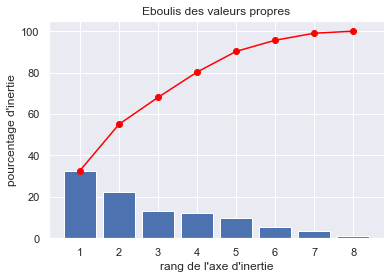

In [130]:
n_comp = 8

data = factfood[['energy_100g', "saturated-fat_100g", "fat_100g","sugars_100g", "carbohydrates_100g",
                'proteins_100g', 'salt_100g', "fiber_100g"]]

X = data.values
features = data.columns
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

scree = pca.explained_variance_ratio_*100
plt.bar(np.arange(len(scree))+1, scree)
plt.plot(np.arange(len(scree))+1, scree.cumsum(),c="red",marker='o')
plt.xlabel("rang de l'axe d'inertie")
plt.ylabel("pourcentage d'inertie")
plt.title("Eboulis des valeurs propres")
plt.show(block=False)


In [131]:
pca.explained_variance_ratio_.cumsum()

array([0.32674604, 0.55021398, 0.6802047 , 0.80229738, 0.90211337,
       0.95602133, 0.989968  , 1.        ])

In [132]:
pca.explained_variance_ratio_

array([0.32674604, 0.22346794, 0.12999073, 0.12209267, 0.099816  ,
       0.05390795, 0.03394668, 0.010032  ])

32 % de l’inertie totale sont associés à F1, et 22 % à F2, 
le premier plan factoriel représente alors 54 % de l’inertie totale.


In [133]:
#Séléction des nutriscore grade non nul
fact1=factfood[pd.isnull(factfood['nutriscore_grade'])==False]

In [134]:
def display_circles(pcs, n_comp, pca, axis_ranks, labels=None, label_rotation=0, lims=None):
    for d1, d2 in axis_ranks: # On affiche les 3 premiers plans factoriels, donc les 6 premières composantes
        if d2 < n_comp:

            # initialisation de la figure
            fig, ax = plt.subplots(figsize=(10,10))

            # détermination des limites du graphique
            if lims is not None :
                xmin, xmax, ymin, ymax = lims
            elif pcs.shape[1] < 30 :
                xmin, xmax, ymin, ymax = -1, 1, -1, 1
            else :
                xmin, xmax, ymin, ymax = min(pcs[d1,:]), max(pcs[d1,:]), min(pcs[d2,:]), max(pcs[d2,:])

            # affichage des flèches
            # s'il y a plus de 30 flèches, on n'affiche pas le triangle à leur extrémité
            if pcs.shape[1] < 30 :
                plt.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                   pcs[d1,:], pcs[d2,:], 
                   angles='xy', scale_units='xy', scale=1, color="grey")
                # (voir la doc : https://matplotlib.org/api/_as_gen/matplotlib.pyplot.quiver.html)
            else:
                lines = [[[0,0],[x,y]] for x,y in pcs[[d1,d2]].T]
                ax.add_collection(LineCollection(lines, axes=ax, alpha=.1, color='black'))
            
            # affichage des noms des variables  
            if labels is not None:  
                for i,(x, y) in enumerate(pcs[[d1,d2]].T):
                    if x >= xmin and x <= xmax and y >= ymin and y <= ymax :
                      plt.text(x, y, labels[i], fontsize='14', ha='center', va='center', rotation=label_rotation, color="blue", alpha=0.5)
            
            # affichage du cercle
            an = np.linspace(0, 2 * np.pi, 100)  # Add a unit circle for scale
            plt.plot(np.cos(an), np.sin(an))
            plt.axis('equal')

            # définition des limites du graphique
            plt.xlim(xmin, xmax)
            plt.ylim(ymin, ymax)
        
           
            # nom des axes, avec le pourcentage d'inertie expliqué
            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

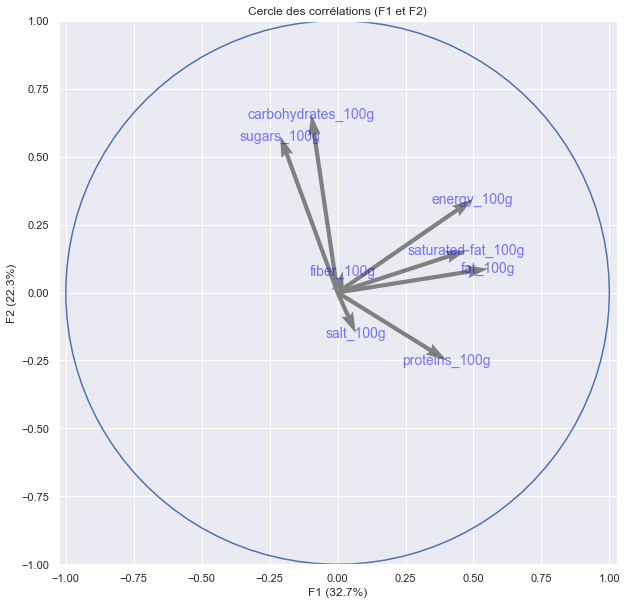

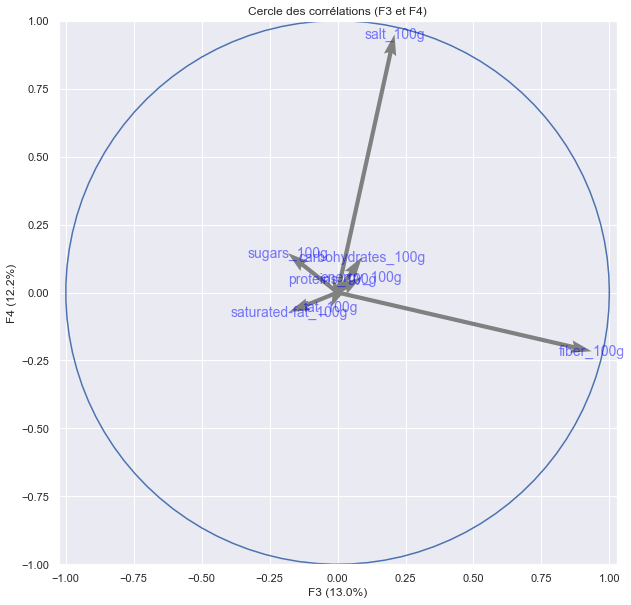

In [135]:
#Cercles des corrélations
n_comp = 4
scaler = StandardScaler()
pca = PCA(n_components=n_comp)
pca_components = pca.fit_transform(X_scaled)
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3)], labels = np.array(features))

In [136]:
#Corrélation entre les variables et les axes factoriels
f1= pca.components_[0]
print(f1)
f2= pca.components_[1]
print(f2)
f3= pca.components_[2]
print(f3)
f4= pca.components_[3]
print(f4)

[ 0.49744767  0.47499121  0.55445647 -0.21119647 -0.09652778  0.40085673
  0.06718261  0.01964689]
[ 0.34311895  0.15490559  0.08796542  0.57526809  0.65492024 -0.24894066
 -0.15004101  0.07872788]
[ 0.08670737 -0.17911521 -0.02381415 -0.18287235  0.0894917  -0.01817196
  0.20960431  0.93494236]
[ 0.05574135 -0.07200253 -0.05324887  0.1450241   0.12974344  0.04889362
  0.94964301 -0.21632227]


In [137]:
def display_factorial_planes(X_projected, n_comp, pca, axis_ranks, labels=None, alpha=1, illustrative_var=None):
    for d1,d2 in axis_ranks:
        if d2 < n_comp:

            fig = plt.figure(figsize=(20,20))

            if illustrative_var is None:
                plt.scatter(X_projected[:, d1], X_projected[:, d2], alpha=alpha)
            else:
                illustrative_var = np.array(illustrative_var)
                for value in np.unique(illustrative_var):
                    selected = np.where(illustrative_var == value)
                    plt.scatter(X_projected[selected, d1], X_projected[selected, d2], alpha=alpha, label=value)
                plt.legend()

    
            if labels is not None:
                for i,(x,y) in enumerate(X_projected[:,[d1,d2]]):
                    plt.text(x, y, labels[i],
                              fontsize='14', ha='center',va='center') 
                

            boundary = np.max(np.abs(X_projected[:, [d1,d2]])) * 1.1
            plt.xlim([-boundary,boundary])
            plt.ylim([-boundary,boundary])
        

            plt.plot([-100, 100], [0, 0], color='grey', ls='--')
            plt.plot([0, 0], [-100, 100], color='grey', ls='--')

            plt.xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1],1)))
            plt.ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2],1)))

            plt.title("Projection des individus (sur F{} et F{})".format(d1+1, d2+1))
            plt.show(block=False)

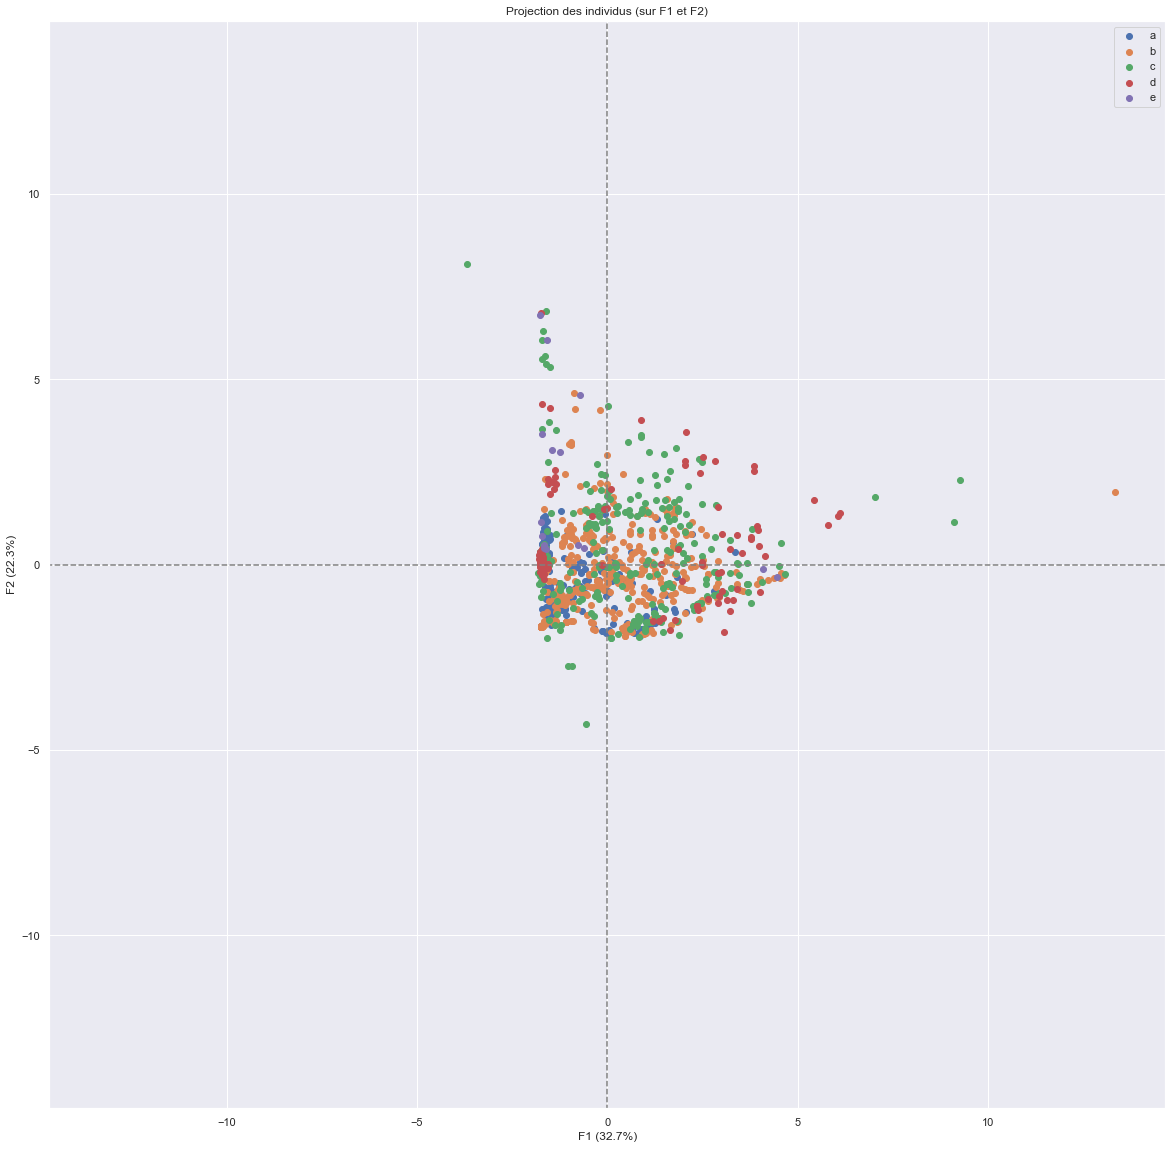

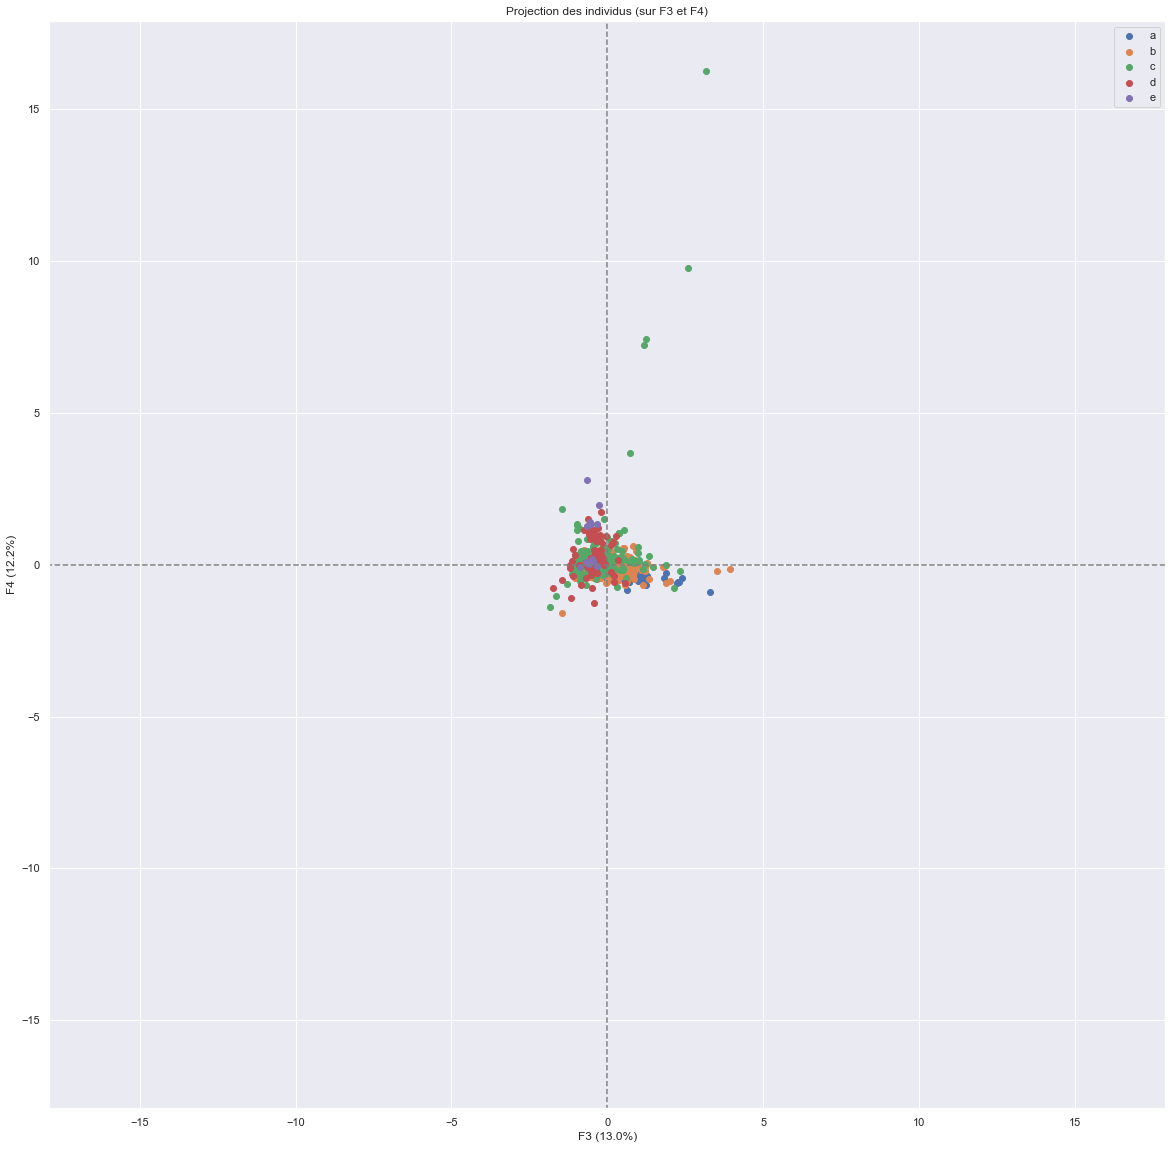

In [138]:
# Projection des individus
#Pour simplifier, on a projeté un échantillon de 1000 individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected[0:1000], n_comp, pca, [(0,1),(2,3)], illustrative_var = fact1['nutriscore_grade'][0:1000])
plt.show()

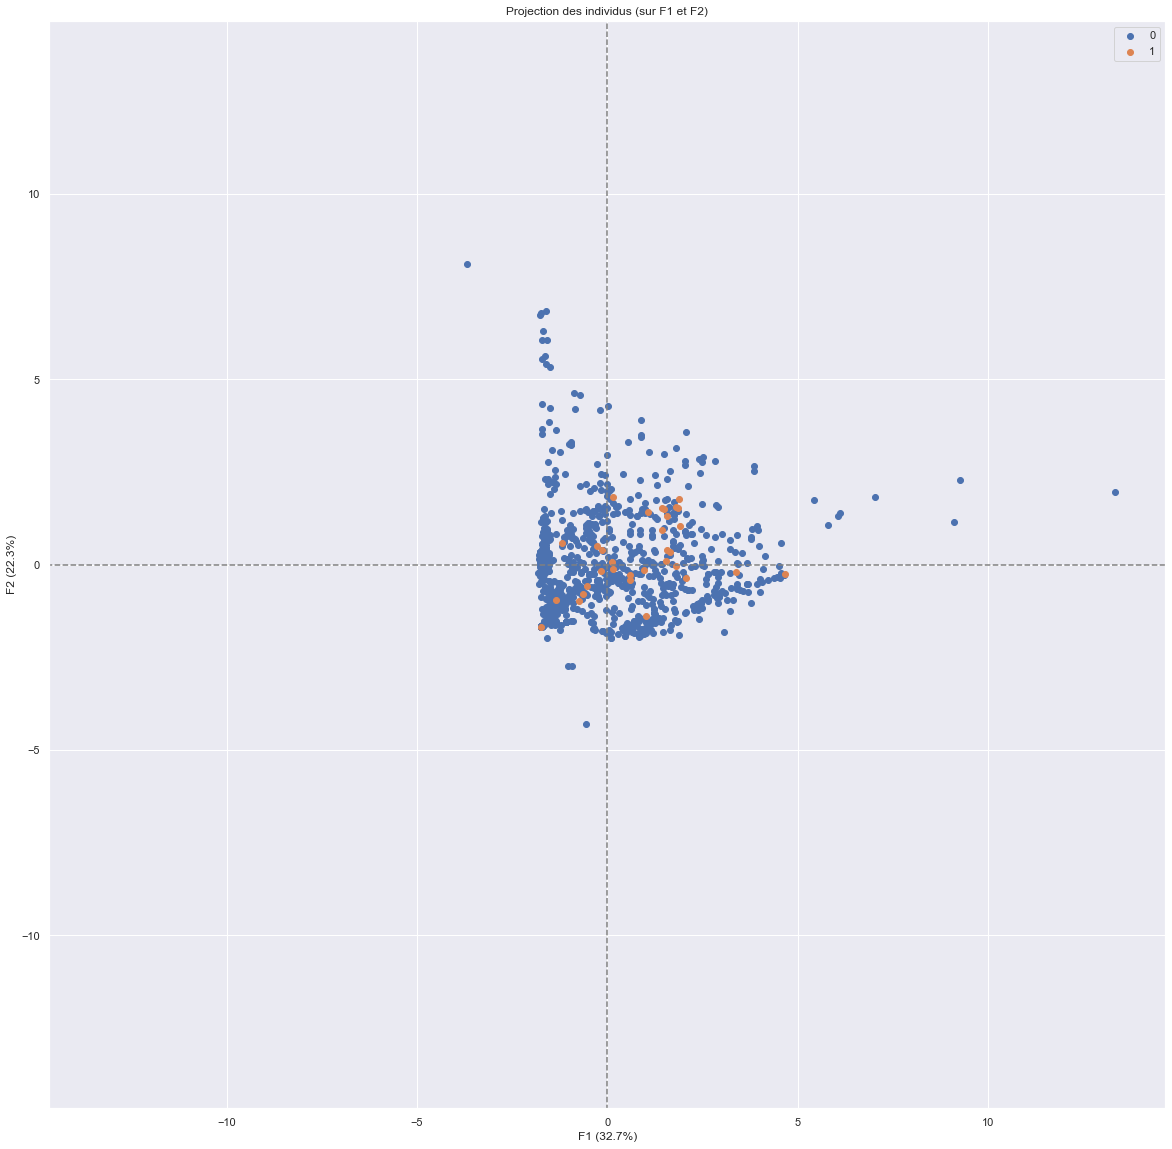

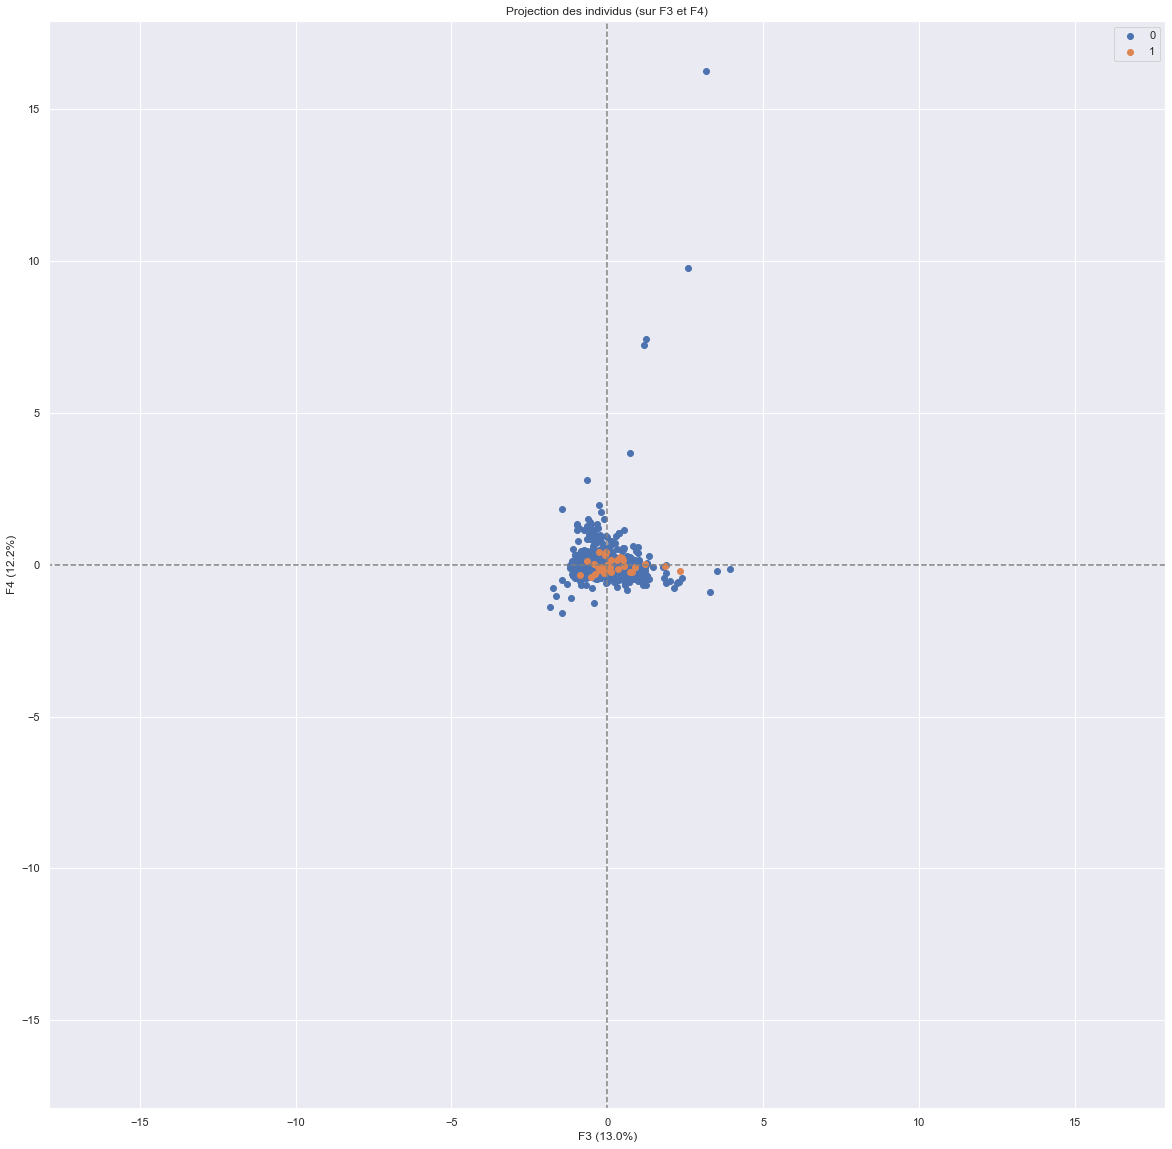

In [139]:
# Projection des individus
#Pour simplifier, on a projeté un échantillon de 1000 individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected[0:1000], n_comp, pca, [(0,1),(2,3)], illustrative_var = fact1['Gluten'][0:1000])
plt.show()